# **CITY BIKE PROJECT - 2025**

In [1]:
# Step 2: Setup
import os
import pandas as pd

In [2]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/city_bike_data'
output_path = '/content/drive/MyDrive/merged_cleaned.csv'

# Remove previous output if exists
if os.path.exists(output_path):
    os.remove(output_path)

# Step 3: Read, clean, and merge in batches
batch_size = 10
batch = []
first_write = True

csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])
print(f"Found {len(csv_files)} CSV files.")

for i, file in enumerate(csv_files):
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(file_path, on_bad_lines='skip')

        # --- CLEANING STEPS ---
        df.dropna(how='all', inplace=True)                    # Remove fully empty rows
        df = df.drop_duplicates()                             # Remove exact duplicates
        df.columns = df.columns.str.strip()                   # Clean column names

        # Standardize datetime column
        if 'starttime' in df.columns:
            df.rename(columns={'starttime': 'started_at'}, inplace=True)
        elif 'started_at' not in df.columns:
            print(f"⚠️ No valid start time column in {file}")
            continue

        # Parse date column
        df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')

        # Filter invalid dates
        df = df[df['started_at'].notna()]

        # Remove negative or zero duration if available
        if 'tripduration' in df.columns:
            df = df[df['tripduration'] > 0]

        batch.append(df)
        print(f"Loaded: {file} → {len(df)} rows")

        # Write batch
        if len(batch) == batch_size or i == len(csv_files) - 1:
            combined = pd.concat(batch, ignore_index=True)
            combined.to_csv(output_path, mode='a', header=first_write, index=False)
            print(f"→ Wrote batch {i // batch_size + 1} with {combined.shape[0]} rows")
            batch = []
            first_write = False

    except Exception as e:
        print(f"❌ Error processing {file}: {e}")

# Step 4: Confirm output
print(f"\n✅ Cleaning complete. Output saved to: {output_path}")

Found 16 CSV files.


/tmp/ipython-input-3-4226862543.py:19: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Loaded: 202501-citibike-tripdata_1.csv → 1000000 rows


/tmp/ipython-input-3-4226862543.py:19: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Loaded: 202501-citibike-tripdata_2.csv → 1000000 rows
Loaded: 202501-citibike-tripdata_3.csv → 124475 rows


/tmp/ipython-input-3-4226862543.py:19: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Loaded: 202502-citibike-tripdata_1.csv → 1000000 rows


/tmp/ipython-input-3-4226862543.py:19: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Loaded: 202502-citibike-tripdata_2.csv → 1000000 rows
Loaded: 202502-citibike-tripdata_3.csv → 31257 rows


/tmp/ipython-input-3-4226862543.py:19: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Loaded: 202503-citibike-tripdata.csv → 3168271 rows


/tmp/ipython-input-3-4226862543.py:19: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Loaded: 202504-citibike-tripdata_1.csv → 1000000 rows


/tmp/ipython-input-3-4226862543.py:19: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Loaded: 202504-citibike-tripdata_2.csv → 1000000 rows


/tmp/ipython-input-3-4226862543.py:19: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Loaded: 202504-citibike-tripdata_3.csv → 1000000 rows
→ Wrote batch 1 with 10324003 rows


/tmp/ipython-input-3-4226862543.py:19: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Loaded: 202504-citibike-tripdata_4.csv → 724596 rows


/tmp/ipython-input-3-4226862543.py:19: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Loaded: 202505-citibike-tripdata_1.csv → 1000000 rows


/tmp/ipython-input-3-4226862543.py:19: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Loaded: 202505-citibike-tripdata_2.csv → 1000000 rows


/tmp/ipython-input-3-4226862543.py:19: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Loaded: 202505-citibike-tripdata_3.csv → 1000000 rows


/tmp/ipython-input-3-4226862543.py:19: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Loaded: 202505-citibike-tripdata_4.csv → 1000000 rows


/tmp/ipython-input-3-4226862543.py:19: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Loaded: 202505-citibike-tripdata_5.csv → 325553 rows
→ Wrote batch 2 with 5050149 rows

✅ Cleaning complete. Output saved to: /content/drive/MyDrive/merged_cleaned.csv


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/merged_cleaned.csv', parse_dates=['started_at'], on_bad_lines='skip')

/tmp/ipython-input-3-2377109420.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/merged_cleaned.csv', parse_dates=['started_at'], on_bad_lines='skip')


In [ ]:
# check for the null values

df.isnull().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,5375
start_station_id,5375
end_station_name,38086
end_station_id,39983
start_lat,0
start_lng,0


**Dropping and Encoding columns**

In [ ]:
df=df.dropna(subset=['started_at', 'end_lat', 'end_lng', 'start_station_name', 'end_station_name', 'start_station_id', 'end_station_id'])
df.isnull().sum()


,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
start_station_id,0
end_station_name,0
end_station_id,0
start_lat,0
start_lng,0


**Changing Data Types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15329730 entries, 0 to 15374151
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            object        
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 1.6+ GB


In [ ]:
# Convert timestamps
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')

# Convert categorical string columns
categorical_columns = ['rideable_type', 'member_casual']

for col in categorical_columns:
    df[col] = df[col].astype('category')

**New Column Trip Duration**

In [ ]:
df['trip_duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [ ]:
# Hour of the day (0–23)
df['hour_of_day'] = df['started_at'].dt.hour

# Day of the week name (e.g., Monday, Tuesday)
df['day_of_week'] = df['started_at'].dt.day_name()

# Day of week number (Monday=0, Sunday=6)
df['day_of_week_num'] = df['started_at'].dt.dayofweek

# Is weekend (Saturday=5, Sunday=6 → True)
df['is_weekend'] = df['day_of_week_num'] >= 5

# Month name (e.g., January)
df['month'] = df['started_at'].dt.month_name()

# Month number (1–12)
df['month_num'] = df['started_at'].dt.month

# Year (if your data spans multiple years)
df['year'] = df['started_at'].dt.year

**Save cleaned**

In [ ]:
df.to_csv('/content/drive/MyDrive/final_cleaned.csv', index=False)

**After Saved read the file**

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
chunks = []
chunk_size = 500_000  # Try 100_000 if you still hit memory issues

for chunk in pd.read_csv('/content/drive/MyDrive/final_cleaned.csv', chunksize=chunk_size):
    chunks.append(chunk)

df = pd.concat(chunks, ignore_index=True)

/tmp/ipython-input-3-823476911.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('/content/drive/MyDrive/final_cleaned.csv', chunksize=chunk_size):
/tmp/ipython-input-3-823476911.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('/content/drive/MyDrive/final_cleaned.csv', chunksize=chunk_size):
/tmp/ipython-input-3-823476911.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('/content/drive/MyDrive/final_cleaned.csv', chunksize=chunk_size):
/tmp/ipython-input-3-823476911.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('/content/drive/MyDrive/final_cleaned.csv', chunksize=chunk_size):
/tmp/ipython-input-3-823476911.py:4: DtypeWarning: Columns (7) have 

In [10]:
# Check columns
print(df.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'trip_duration_min', 'hour_of_day', 'day_of_week',
       'day_of_week_num', 'is_weekend', 'month', 'month_num', 'year'],
      dtype='object')


In [14]:
df.head()         # First 5 rows

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,trip_duration_min,hour_of_day,day_of_week,day_of_week_num,is_weekend,month,month_num,year
0,56BD148A05E26915,electric_bike,2025-01-01 22:19:06.324,2025-01-01 22:23:32.899,W 36 St & 7 Ave,6483.06,W 24 St & 7 Ave,6257.03,40.752149,-73.989539,...,-73.995299,member,4.442917,22,Wednesday,2,False,January,1,2025
1,700CCCDF00C08077,electric_bike,2025-01-09 15:20:43.991,2025-01-09 15:26:19.137,Broadway & E 19 St,5980.11,W 24 St & 7 Ave,6257.03,40.738290,-73.990060,...,-73.995299,member,5.585767,15,Thursday,3,False,January,1,2025
2,B1A3FAFA5FE651CE,electric_bike,2025-01-01 12:54:26.571,2025-01-01 13:03:03.565,Jackson Ave & 46 Rd,6203.02,Crescent St & Broadway,6827.11,40.745248,-73.947333,...,-73.928647,member,8.616567,12,Wednesday,2,False,January,1,2025
3,9CB0F28054BA5EBC,electric_bike,2025-01-14 13:43:59.151,2025-01-14 13:49:04.543,Broadway & E 19 St,5980.11,W 24 St & 7 Ave,6257.03,40.738290,-73.990060,...,-73.995299,member,5.089867,13,Tuesday,1,False,January,1,2025
4,A1B8FDD4FAF0C2B2,electric_bike,2025-01-13 07:20:37.176,2025-01-13 07:29:18.015,Willis Ave & E 143 St,7798.02,1 Ave & E 110 St,7522.02,40.812299,-73.920370,...,-73.938300,member,8.680650,7,Monday,0,False,January,1,2025


In [15]:
df.tail()         # Last 5 rows

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,trip_duration_min,hour_of_day,day_of_week,day_of_week_num,is_weekend,month,month_num,year
15329725,32F569A2ACCFF1BB,electric_bike,2025-05-31 19:26:41.288,2025-05-31 19:41:36.520,Park Ave & E 124 St,7682.01,E 84 St & 1 Ave,7180.02,40.804555,-73.939686,...,-73.950686,member,14.920533,19,Saturday,5,True,May,5,2025
15329726,B053663BE4A0AEE3,classic_bike,2025-05-24 12:40:16.578,2025-05-24 12:54:32.853,W 34 St & Hudson Blvd E,6535.04,W 45 St & 8 Ave,6676.02,40.755167,-74.000599,...,-73.988597,casual,14.271250,12,Saturday,5,True,May,5,2025
15329727,D1DC4D9EA5E3FFC1,classic_bike,2025-05-26 21:42:36.222,2025-05-26 22:07:40.490,E 188 St & Hughes Ave,8485.01,E 180 St & Monterey Ave,8392.02,40.856100,-73.886250,...,-73.893010,member,25.071133,21,Monday,0,False,May,5,2025
15329728,E461C1E7D327C276,electric_bike,2025-05-30 19:57:41.844,2025-05-30 20:09:03.503,1 Ave & E 38 St,6230.02,E 7 St & Ave C,5545.01,40.746202,-73.971822,...,-73.979013,member,11.360983,19,Friday,4,False,May,5,2025
15329729,5F2228274547BF40,electric_bike,2025-05-23 13:05:53.512,2025-05-23 13:20:04.891,Park Ave & E 124 St,7682.01,3 Ave & E 72 St,7028.04,40.804555,-73.939686,...,-73.960607,member,14.189650,13,Friday,4,False,May,5,2025


In [16]:
df.sample(5)      # Random 5 rows

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,trip_duration_min,hour_of_day,day_of_week,day_of_week_num,is_weekend,month,month_num,year
4903233,59F5444FDB0C49A7,classic_bike,2025-03-01 23:12:22.208,2025-03-01 23:15:02.454,E 77 St & 3 Ave,7092.06,E 77 St & 1 Ave,7020.02,40.773142,-73.958562,...,-73.953562,member,2.670767,23,Saturday,5,True,March,3,2025
4313895,0F28AC6726C5478F,classic_bike,2025-03-05 07:30:18.912,2025-03-05 07:44:34.513,Great Jones St,5636.11,Catherine St & Monroe St,5128.04,40.727434,-73.993790,...,-73.996826,member,14.260017,7,Wednesday,2,False,March,3,2025
6667369,057194A88F4A39D9,electric_bike,2025-03-27 16:42:37.318,2025-03-27 16:51:54.240,Court St & State St,4488.08,5 Ave & 3 St,3987.06,40.690238,-73.992031,...,-73.983524,member,9.282033,16,Thursday,3,False,March,3,2025
10970128,49A20A46F19D0F8A,classic_bike,2025-04-17 12:45:43.825,2025-04-17 12:50:31.375,Macon St & Patchen Ave,4301.04,Chauncey St & Malcolm X Blvd,4228.06,40.683740,-73.926100,...,-73.928420,casual,4.792500,12,Thursday,3,False,April,4,2025
2015149,67C57BEC8D94FFAB,electric_bike,2025-01-17 12:17:48.521,2025-01-17 12:25:53.313,Greenwich Ave & 8 Ave,6072.06,W 45 St & 8 Ave,6676.02,40.739017,-74.002638,...,-73.988597,member,8.079867,12,Friday,4,False,January,1,2025


In [17]:
df.shape

(15329730, 21)

In [18]:
df[['started_at', 'hour_of_day', 'day_of_week', 'is_weekend', 'month']].head()

,started_at,hour_of_day,day_of_week,is_weekend,month
0,2025-01-01 22:19:06.324,22,Wednesday,False,January
1,2025-01-09 15:20:43.991,15,Thursday,False,January
2,2025-01-01 12:54:26.571,12,Wednesday,False,January
3,2025-01-14 13:43:59.151,13,Tuesday,False,January
4,2025-01-13 07:20:37.176,7,Monday,False,January


**Usage Patterns (Basic)**

In [19]:
df['member_casual'].value_counts()

,count
member_casual,
member,13044118
casual,2285612


In [20]:
df['rideable_type'].value_counts()

,count
rideable_type,
electric_bike,10693769
classic_bike,4635961


In [21]:
df['start_station_name'].value_counts().head(10)

,count
start_station_name,
W 21 St & 6 Ave,58181
Pier 61 at Chelsea Piers,53369
Lafayette St & E 8 St,49346
W 31 St & 7 Ave,48180
9 Ave & W 33 St,45550
West St & Chambers St,44772
Broadway & E 14 St,44512
University Pl & E 14 St,44505
11 Ave & W 41 St,43682


**Checking max and min dates**

In [22]:
print("Start Date:", df['started_at'].min())
print("End Date:  ", df['started_at'].max())

Start Date: 2024-12-31 12:54:23.643
End Date:   2025-05-31 23:58:06.793


In [ ]:
print("Null started_at count:", df['started_at'].isna().sum())

Null started_at count: 0


In [ ]:
print("Total rows:", df.shape[0])
print("Unique rows:", df.drop_duplicates().shape[0])

Total rows: 15329730


Text(0, 0.5, 'Number of Rides')

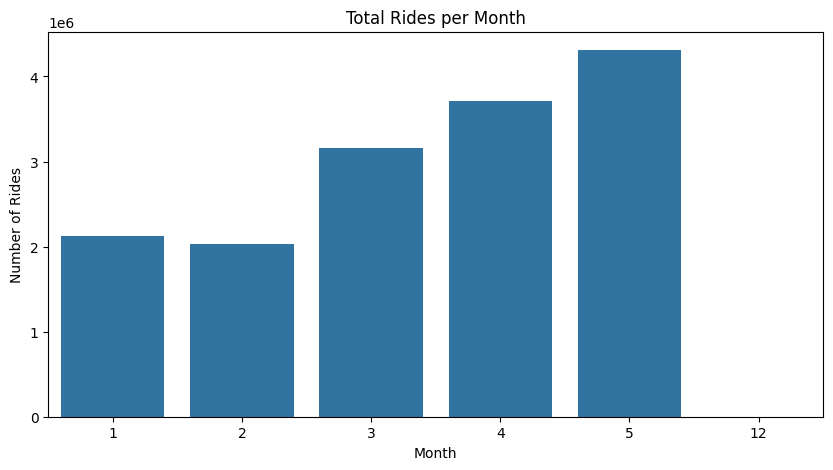

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

monthly = df.groupby('month_num')['ride_id'].count().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly.index, y=monthly.values)
plt.title('Total Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')

Text(0, 0.5, 'Duration (min)')

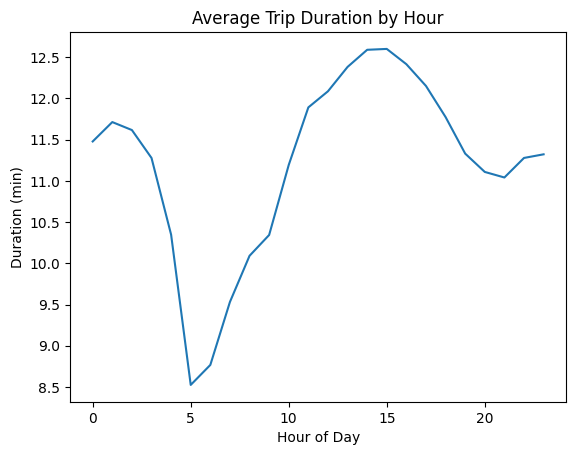

In [6]:
hourly = df.groupby('hour_of_day')['trip_duration_min'].mean()
sns.lineplot(x=hourly.index, y=hourly.values)
plt.title('Average Trip Duration by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Duration (min)')

	1.	Which month had the most bike rides?
	2.	Which day of the week is the busiest for rides?
	3.	What time of day do most rides happen?
	4.	Do weekdays vs weekends show different usage patterns?
	5.	How has usage changed over the year? (seasonal trend)
  6.	What percentage of rides come from members vs. casual users?
  7.	Do members ride more consistently throughout the week than casual users?
	8.	Which bike types are preferred by each membership group?
  9.	What are the top 10 most used start stations?
  10.	Are there specific stations more popular with members vs. casuals?
  11.	What is the average trip duration by bike type?



In [5]:
# Rides by month
monthly_rides = df.groupby('month')[['ride_id']].count().reset_index()

# Rides by day of week
weekday_rides = df.groupby('day_of_week')[['ride_id']].count().reset_index()

# Rides by hour of day
hourly_rides = df.groupby('hour_of_day')[['ride_id']].count().reset_index()

# Weekend vs weekday comparison
weekend_rides = df.groupby('is_weekend')[['ride_id']].count().reset_index()

# Rides by user type
user_type_pct = df['member_casual'].value_counts(normalize=True) * 100

# Bike preference by user type
bike_user_combo = df.groupby(['member_casual', 'rideable_type'])[['ride_id']].count().reset_index()

# Average trip duration by bike type
avg_trip_by_bike = df.groupby('rideable_type')['trip_duration_min'].mean().reset_index()

# Top 10 start stations
top_start_stations = df['start_station_name'].value_counts().head(10).reset_index()
top_start_stations.columns = ['start_station_name', 'ride_count']

# Start stations by user type
station_user = df.groupby(['start_station_name', 'member_casual'])[['ride_id']].count().reset_index()

In [6]:
monthly_rides.to_csv('/content/drive/MyDrive/monthly_rides.csv', index=False)
weekday_rides.to_csv('/content/drive/MyDrive/weekday_rides.csv', index=False)
hourly_rides.to_csv('/content/drive/MyDrive/hourly_rides.csv', index=False)
bike_user_combo.to_csv('/content/drive/MyDrive/bike_user_combo.csv', index=False)
top_start_stations.to_csv('/content/drive/MyDrive/top_start_stations.csv', index=False)
station_user.to_csv('/content/drive/MyDrive/station_user.csv', index=False)

In [7]:
summary = {
    'Total Rides': len(df),
    'Avg Trip Duration (min)': df['trip_duration_min'].mean(),
    'Member %': user_type_pct['member'],
    'Casual %': user_type_pct['casual'],
    'Top Station': df['start_station_name'].value_counts().idxmax()
}
pd.DataFrame([summary]).to_csv('/content/drive/MyDrive/summary.csv', index=False)

# **1. Which month had the most bike rides?**

In [8]:
#customize palette and style (for seaborn)
sns.set_style('whitegrid')
sns.set_palette("Set2")

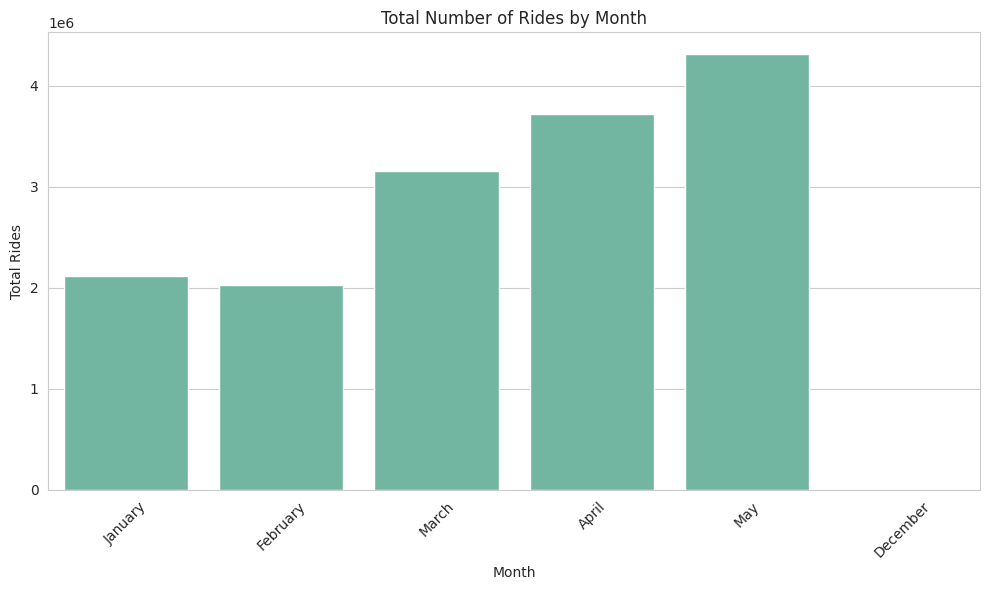

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by month number to keep correct order
monthly_rides = df.groupby('month_num')['ride_id'].count().reset_index()

# Rename for clarity
monthly_rides.columns = ['month_num', 'total_rides']

# Add month names for labeling
monthly_rides['month'] = monthly_rides['month_num'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))

# Sort by month number to ensure calendar order
monthly_rides = monthly_rides.sort_values('month_num')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_rides', data=monthly_rides)
plt.title('Total Number of Rides by Month')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
df[df['month_num'] == 12].shape

(182, 21)

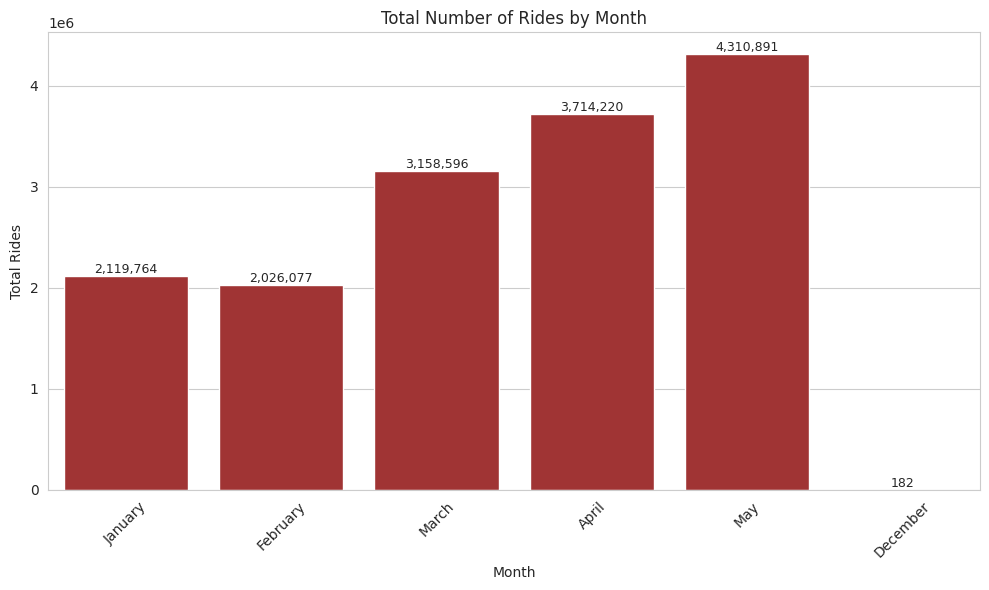

In [11]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='month', y='total_rides', data=monthly_rides, color='firebrick')

# Add labels
for p in barplot.patches:
    height = int(p.get_height())
    barplot.annotate(f'{height:,}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom', fontsize=9)

plt.title('Total Number of Rides by Month')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **2.    Which day of the week is the busiest for rides?**

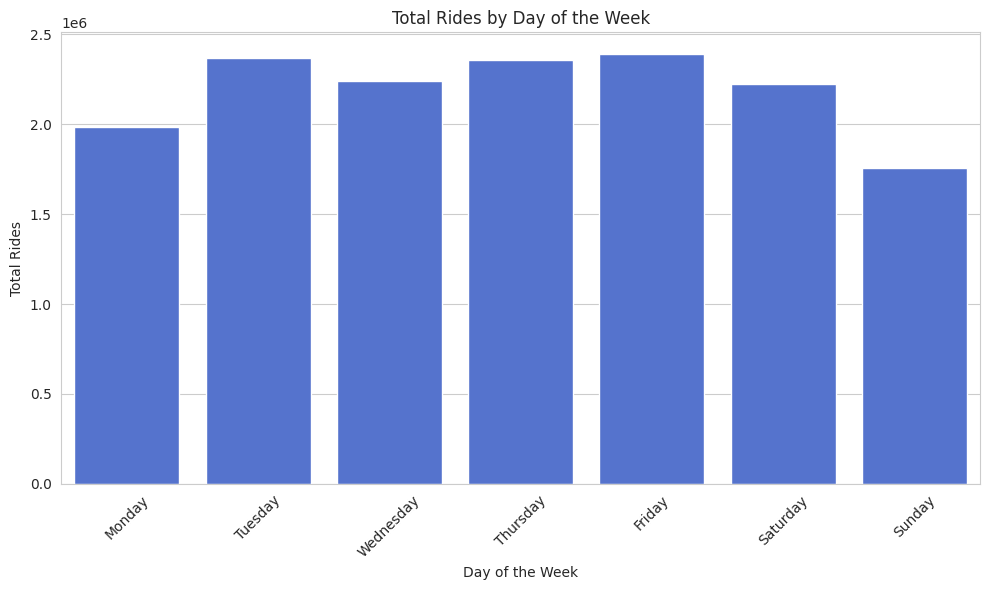

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by day of the week
day_of_week_col = df.groupby('day_of_week')['ride_id'].count().reset_index()
day_of_week_col.columns = ['day_of_week', 'total_rides']

# Define custom sort order for days
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_col['day_of_week'] = pd.Categorical(day_of_week_col['day_of_week'], categories=ordered_days, ordered=True)
day_of_week_col = day_of_week_col.sort_values('day_of_week')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='total_rides', data=day_of_week_col, color='royalblue')
plt.title('Total Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **3.    What time of day do most rides happen?**

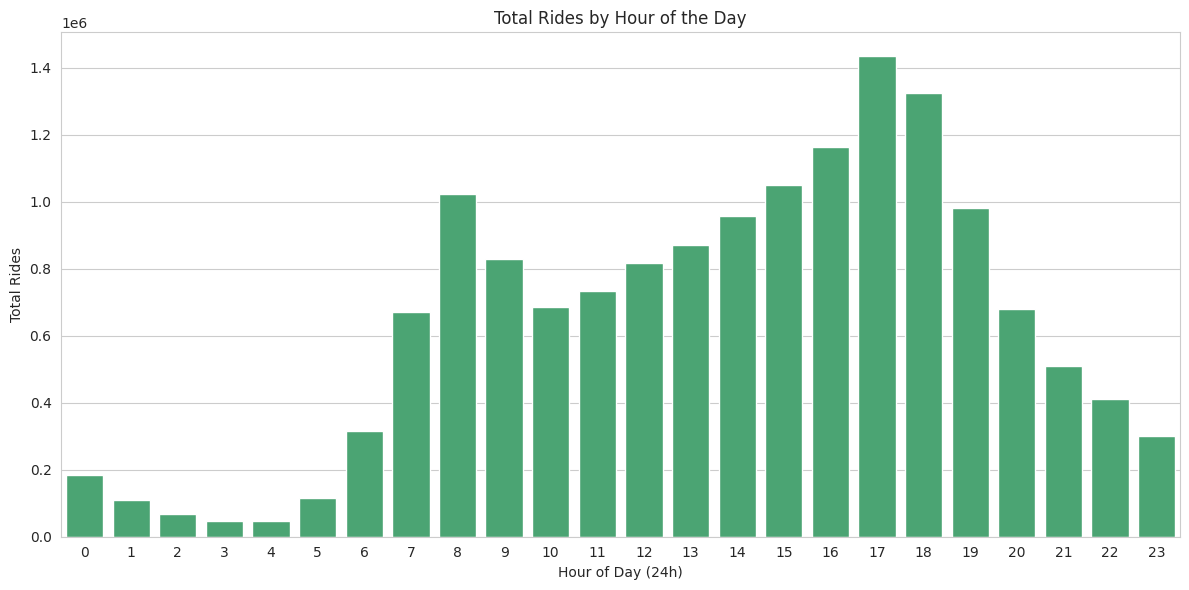

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and count rides per hour
hourly_rides = df.groupby('hour_of_day')['ride_id'].count().reset_index()
hourly_rides.columns = ['hour_of_day', 'total_rides']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='hour_of_day', y='total_rides', data=hourly_rides, color='mediumseagreen')
plt.title('Total Rides by Hour of the Day')
plt.xlabel('Hour of Day (24h)')
plt.ylabel('Total Rides')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# **4.    Do weekdays vs weekends show different usage patterns?**

/tmp/ipython-input-14-2942206074.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='total_rides', data=weekend_summary, palette='Set2')


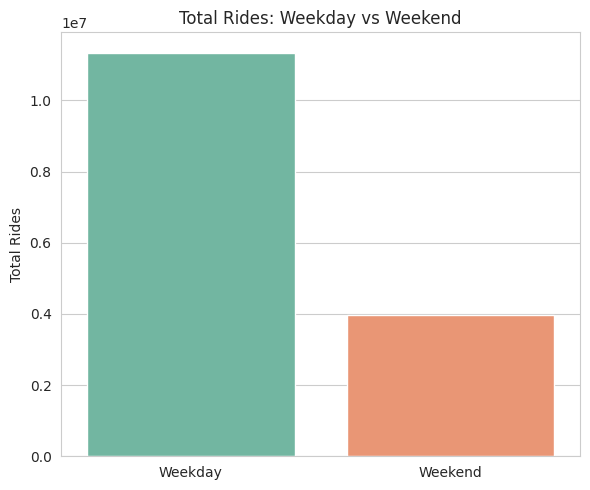

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and count
weekend_summary = df.groupby('is_weekend')['ride_id'].count().reset_index()
weekend_summary['day_type'] = weekend_summary['is_weekend'].map({False: 'Weekday', True: 'Weekend'})
weekend_summary.columns = ['is_weekend', 'total_rides', 'day_type']

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x='day_type', y='total_rides', data=weekend_summary, palette='Set2')
plt.title('Total Rides: Weekday vs Weekend')
plt.ylabel('Total Rides')
plt.xlabel('')
plt.tight_layout()
plt.show()

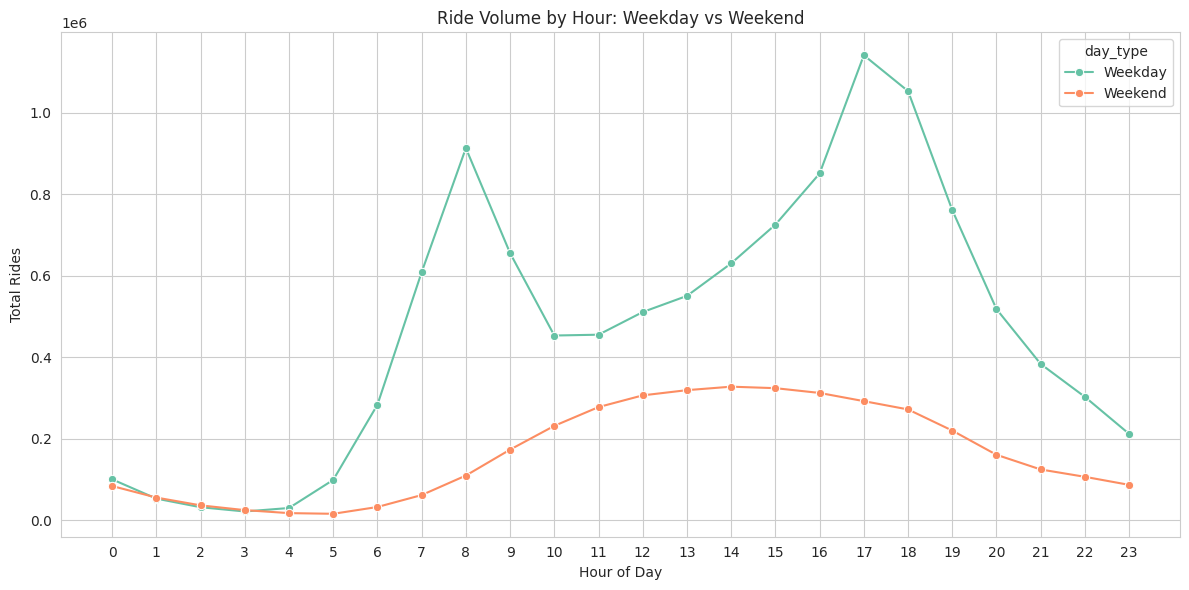

In [15]:
hour_daytype = df.groupby(['hour_of_day', 'is_weekend'])['ride_id'].count().reset_index()
hour_daytype['day_type'] = hour_daytype['is_weekend'].map({False: 'Weekday', True: 'Weekend'})

plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_daytype, x='hour_of_day', y='ride_id', hue='day_type', marker='o')
plt.title('Ride Volume by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Total Rides')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# **5.    How has usage changed over the year? (seasonal trend)**

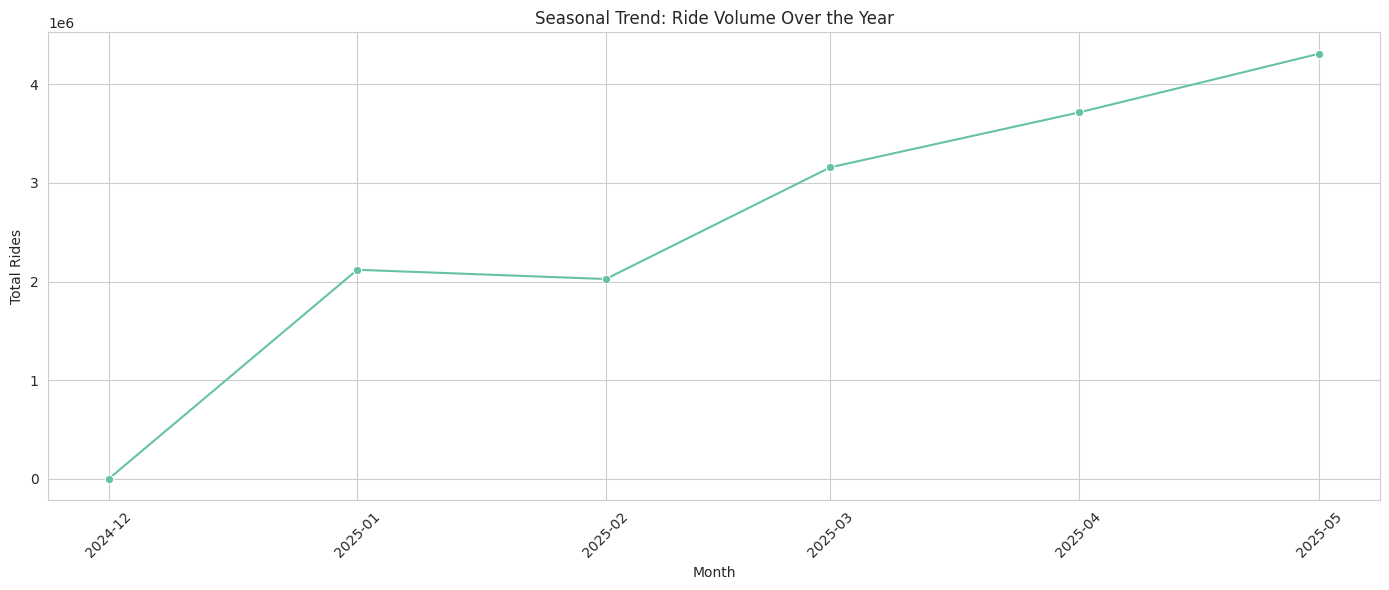

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year + month for seasonal trend
seasonality = (
    df.groupby(['year', 'month_num'])
    .agg(total_rides=('ride_id', 'count'))
    .reset_index()
)

# Create datetime for plotting (optional for better x-axis)
seasonality['date'] = pd.to_datetime(seasonality['year'].astype(str) + '-' + seasonality['month_num'].astype(str) + '-01')

# Sort by date
seasonality = seasonality.sort_values('date')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=seasonality, x='date', y='total_rides', marker='o')
plt.title('Seasonal Trend: Ride Volume Over the Year')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

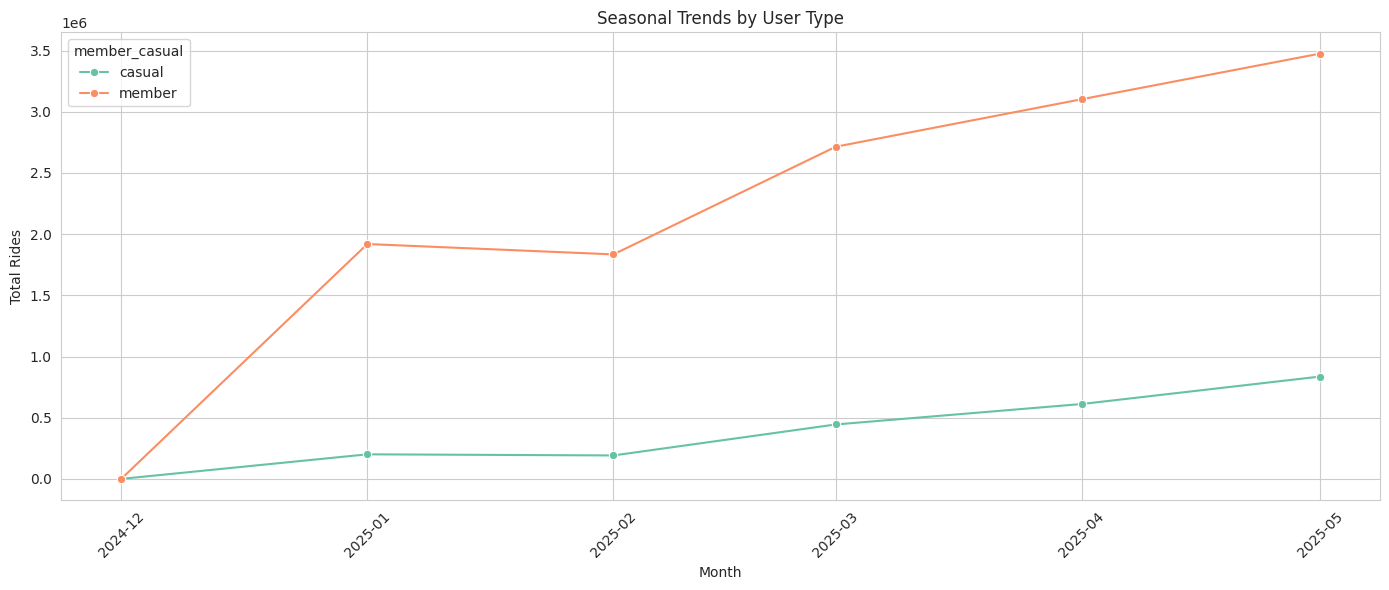

In [17]:
seasonality_user = (
    df.groupby(['year', 'month_num', 'member_casual'])
    .agg(total_rides=('ride_id', 'count'))
    .reset_index()
)
seasonality_user['date'] = pd.to_datetime(seasonality_user['year'].astype(str) + '-' + seasonality_user['month_num'].astype(str) + '-01')

plt.figure(figsize=(14, 6))
sns.lineplot(data=seasonality_user, x='date', y='total_rides', hue='member_casual', marker='o')
plt.title('Seasonal Trends by User Type')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **6. What percentage of rides come from members vs. casual users?**

In [18]:
import matplotlib.pyplot as plt

# Calculate percentage
user_type_pct = df['member_casual'].value_counts(normalize=True).reset_index()
user_type_pct.columns = ['member_casual', 'percentage']
user_type_pct['percentage'] *= 100

# Display
print(user_type_pct)

  member_casual  percentage
0        member   85.090331
1        casual   14.909669


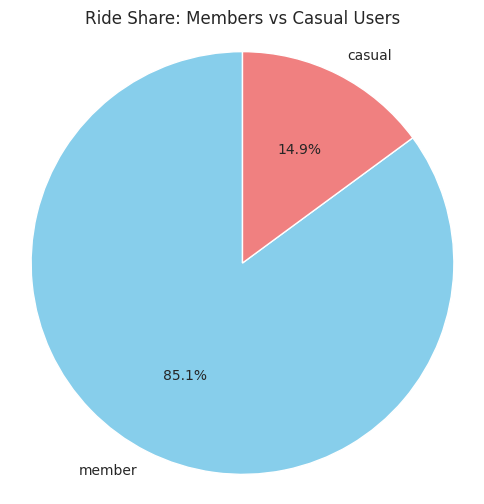

In [20]:
plt.figure(figsize=(6, 6))
plt.pie(user_type_pct['percentage'], labels=user_type_pct['member_casual'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Ride Share: Members vs Casual Users')
plt.axis('equal')  # Equal aspect ratio for perfect circle
plt.show()

# **7. Do members ride more consistently throughout the week than casual users?**

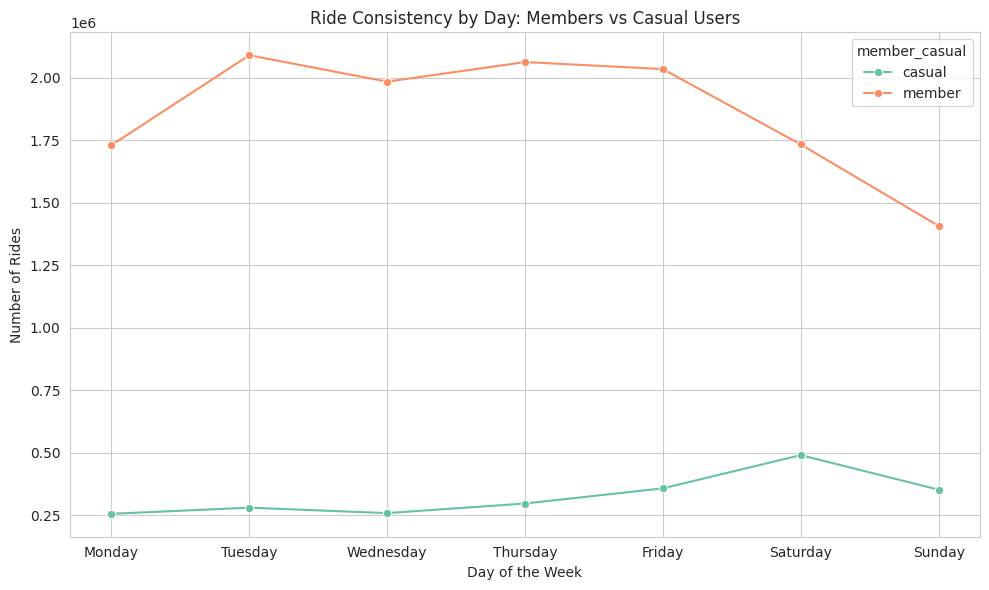

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define proper weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by day of week + user type
weekly_consistency = (
    df.groupby(['day_of_week', 'member_casual'])['ride_id']
    .count()
    .reset_index()
)

# Ensure correct day order
weekly_consistency['day_of_week'] = pd.Categorical(weekly_consistency['day_of_week'], categories=weekday_order, ordered=True)
weekly_consistency = weekly_consistency.sort_values('day_of_week')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_consistency, x='day_of_week', y='ride_id', hue='member_casual', marker='o')
plt.title('Ride Consistency by Day: Members vs Casual Users')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.tight_layout()
plt.show()

# **8. What are the top 10 most used start stations?**

         start_station_name  total_rides
0           W 21 St & 6 Ave        58181
1  Pier 61 at Chelsea Piers        53369
2     Lafayette St & E 8 St        49346
3           W 31 St & 7 Ave        48180
4           9 Ave & W 33 St        45550
5     West St & Chambers St        44772
6        Broadway & E 14 St        44512
7   University Pl & E 14 St        44505
8          11 Ave & W 41 St        43682
9           Ave A & E 14 St        42707


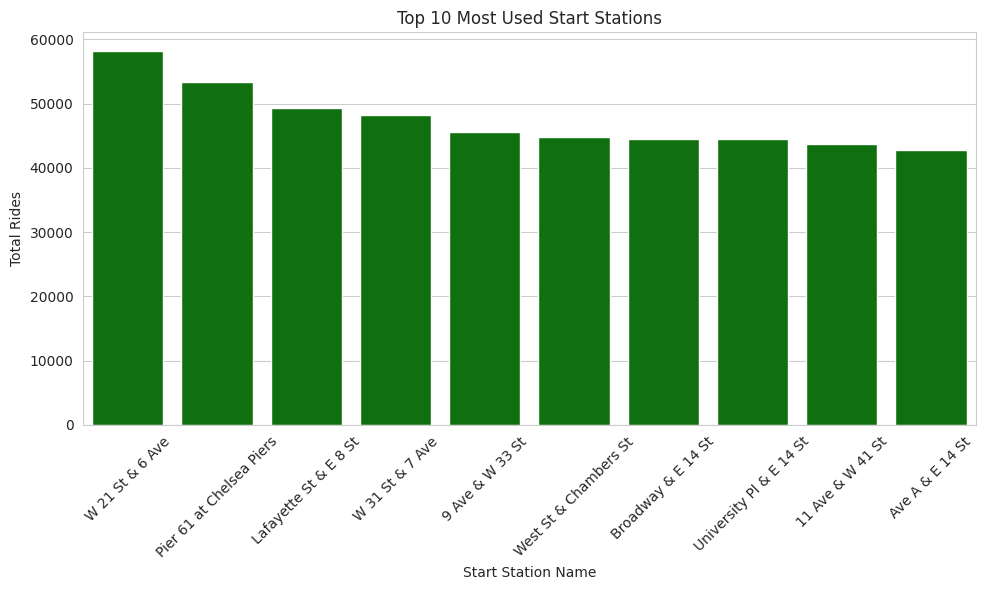

In [22]:
# What are the top 10 most used start stations?
top_start_stations = df['start_station_name'].value_counts().head(10).reset_index()
top_start_stations.columns = ['start_station_name', 'total_rides']

# Display
print(top_start_stations)

#plot
plt.figure(figsize=(10, 6))
sns.barplot(x='start_station_name', y='total_rides', data=top_start_stations, color='green')
plt.title('Top 10 Most Used Start Stations')
plt.xlabel('Start Station Name')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **9. Are there specific stations more popular with members vs. casuals?**

            start_station_name member_casual  ride_id
3966           W 21 St & 6 Ave        member    53379
3298  Pier 61 at Chelsea Piers        member    44707
2782     Lafayette St & E 8 St        member    44270
4006           W 31 St & 7 Ave        member    41521
938            9 Ave & W 33 St        member    39918
3796   University Pl & E 14 St        member    38914
1266        Broadway & E 14 St        member    38766
1108           Ave A & E 14 St        member    38762
77            11 Ave & W 41 St        member    38183
21             1 Ave & E 68 St        member    36372


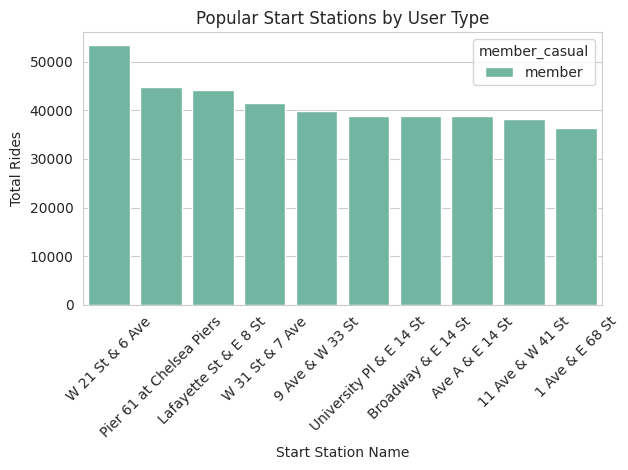

In [23]:
# Are there top 10 specific stations more popular with members vs. casual riders?
station_user = df.groupby(['start_station_name', 'member_casual'])['ride_id'].count().reset_index()
station_user.columns = ['start_station_name', 'member_casual', 'ride_id']

#
station_user = station_user.sort_values('ride_id', ascending=False).head(10)

# Display
print(station_user)

#plot
#plt.figure(figsize=(12, 6))
sns.barplot(x='start_station_name', y='ride_id', hue='member_casual', data=station_user, palette='Set2')
plt.title('Popular Start Stations by User Type')
plt.xlabel('Start Station Name')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **10. What is the average trip duration by bike type?**

In [24]:
# What is the average trip duration by bike type?
avg_trip_by_bike = df.groupby('rideable_type')['trip_duration_min'].mean().reset_index()

# Display
print(avg_trip_by_bike)

   rideable_type  trip_duration_min
0   classic_bike          12.064187
1  electric_bike          11.265052


In [1]:
import pandas as pd

# Load the cleaned file
df = pd.read_csv('/content/drive/MyDrive/final_cleaned.csv', parse_dates=['started_at', 'ended_at'])

# Feature Engineering
df['trip_duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
df['hour_of_day'] = df['started_at'].dt.hour
df['day_of_week'] = df['started_at'].dt.day_name()
df['day_of_week_num'] = df['started_at'].dt.dayofweek
df['is_weekend'] = df['day_of_week_num'] >= 5
df['month'] = df['started_at'].dt.month_name()
df['month_num'] = df['started_at'].dt.month
df['year'] = df['started_at'].dt.year

# Save with features
df.to_csv('/content/drive/MyDrive/final_cleaned_with_features.csv', index=False)
print("✅ Features added and saved.")

/tmp/ipython-input-1-1961191022.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/final_cleaned.csv', parse_dates=['started_at', 'ended_at'])


✅ Features added and saved.


In [3]:
import pandas as pd

# Load a smaller sample (safe even in free Colab)
df = pd.read_csv('/content/drive/MyDrive/final_cleaned_with_features.csv', nrows=500_000)

# Optional: check your columns
print(df.columns)

/tmp/ipython-input-3-973352279.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/final_cleaned_with_features.csv', nrows=500_000)


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'trip_duration_min', 'hour_of_day', 'day_of_week',
       'day_of_week_num', 'is_weekend', 'month', 'month_num', 'year'],
      dtype='object')


In [4]:
monthly_rides = df.groupby('month')[['ride_id']].count().reset_index()
monthly_rides.to_csv('/content/drive/MyDrive/monthly_rides.csv', index=False)

In [5]:
weekday_rides = df.groupby('day_of_week')[['ride_id']].count().reset_index()
weekday_rides.to_csv('/content/drive/MyDrive/weekday_rides.csv', index=False)

In [6]:
hourly_rides = df.groupby('hour_of_day')[['ride_id']].count().reset_index()
hourly_rides.to_csv('/content/drive/MyDrive/hourly_rides.csv', index=False)

In [7]:
user_type_pct = df['member_casual'].value_counts(normalize=True).reset_index()
user_type_pct.columns = ['member_casual', 'percentage']
user_type_pct['percentage'] *= 100
user_type_pct.to_csv('/content/drive/MyDrive/user_type_percentage.csv', index=False)

In [12]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekly_consistency = df.groupby(['day_of_week', 'member_casual'])['ride_id'].count().reset_index()
weekly_consistency['day_of_week'] = pd.Categorical(weekly_consistency['day_of_week'], categories=weekday_order, ordered=True)
weekly_consistency = weekly_consistency.sort_values('day_of_week')

weekly_consistency.to_csv('/content/drive/MyDrive/weekly_consistency.csv', index=False)

In [8]:
bike_user_combo = df.groupby(['member_casual', 'rideable_type'])[['ride_id']].count().reset_index()
bike_user_combo.to_csv('/content/drive/MyDrive/bike_user_combo.csv', index=False)

In [9]:
avg_trip_by_bike = df.groupby('rideable_type')['trip_duration_min'].mean().reset_index()
avg_trip_by_bike.to_csv('/content/drive/MyDrive/avg_trip_by_bike_type.csv', index=False)

In [10]:
top_start_stations = df['start_station_name'].value_counts().head(10).reset_index()
top_start_stations.columns = ['start_station_name', 'ride_count']
top_start_stations.to_csv('/content/drive/MyDrive/top_start_stations.csv', index=False)

In [11]:
station_user = df.groupby(['start_station_name', 'member_casual'])[['ride_id']].count().reset_index()
station_user.to_csv('/content/drive/MyDrive/station_user.csv', index=False)

In [13]:
station_user = df.groupby(['start_station_name', 'member_casual'])['ride_id'].count().reset_index()
station_user.columns = ['start_station_name', 'member_casual', 'ride_id']
station_user = station_user.sort_values('ride_id', ascending=False).head(10)
station_user.to_csv('/content/drive/MyDrive/popular_stations_by_user.csv', index=False)

# **----------Did Not Used These Codes---------------------------**

# **WEATHER DATA**

In [1]:
import psutil
print(f"RAM Available: {psutil.virtual_memory().available / 1024**3:.2f} GB")

RAM Available: 11.13 GB


In [ ]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

In [ ]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 52.52,
	"longitude": 13.41,
	"start_date": "2024-06-01",
	"end_date": "2024-09-30",
	"hourly": "temperature_2m"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m

hourly_dataframe = pd.DataFrame(data=hourly_data)

# Save the DataFrame to a CSV file
file_path = '/content/historical_weather_data.csv'
hourly_dataframe.to_csv(file_path, index=False)  # Corrected 'df' to 'hourly_dataframe'

# Print the DataFrame to verify its content
print(hourly_dataframe)


In [ ]:
import pandas as pd

# Load the two datasets
weather_df = pd.read_csv("/content/historical_weather_data.csv")  # Weather dataset with 'date' and 'temperature_2m'
citibike_df = pd.read_csv("/content/filtered_citibike_data_june_september.csv")  # Citibike dataset

# Step 1: Ensure the date columns are in the same format (datetime)
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.date  # Convert to datetime and then extract only the date part
citibike_df['started_date'] = pd.to_datetime(citibike_df['started_date']).dt.date  # Convert to datetime and extract date part

# Step 2: Merge the datasets on 'date' and 'started_date'
# This will merge on the date and add the 'temperature_2m' column from the weather dataset to the citibike dataset
merged_df = pd.merge(citibike_df, weather_df, left_on='started_date', right_on='date', how='left')

# Step 3: Drop the redundant 'date' column from the merged DataFrame (optional)
merged_df.drop(columns=['date'], inplace=True)

# Step 4: Save the merged DataFrame to a CSV file
output_file_path = "/content/merged_citibike_weather_data.csv"
merged_df.to_csv(output_file_path, index=False)

# Print the merged DataFrame to check the result
print(merged_df.head())


In [ ]:
df.head()

In [ ]:
# Load the dataset
df = pd.read_csv("/content/merged_citibike_weather_data.csv")

# Convert temperature_2m from Celsius to Fahrenheit
df['temperature_2m'] = (df['temperature_2m'] * 9/5) + 32

df.rename(columns={'temperature_2m': 'Temperature(F)'}, inplace=True)

# Save the modified DataFrame back to the same CSV file
df.to_csv("/content/merged_citibike_weather_data.csv", index=False)

# Display the first few rows to verify the conversion
print(df[['Temperature(F)']].head())


# **DATA ANALYSIS**

In [ ]:
df = pd.read_csv("/content/merged_citibike_weather_data.csv")
# Generate summary statistics for the DataFrame
summary_stat = df.describe()
print(summary_stat)

In [ ]:
# Display the distinct classes
df.nunique()

In [ ]:
# Display the distribution counts for each class
#df.count()
df.value_counts()

In [ ]:
print(df.columns)

In [ ]:

df.columns = df.columns.str.strip()

# Optional: Rename columns for consistency (if needed)
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.rename(columns={'start_station_name': 'start_station_address'}, inplace=True)
df.rename(columns={'end_station_name': 'end_station_address'}, inplace=True)

# Save the cleaned dataset back to the CSV
df.to_csv("/content/merged_citibike_weather_data.csv", index=False)


In [ ]:
df.head()

# Trip Duration Prediction (Model Setup)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import pandas as pd

# Attempt to read the CSV file and inspect the first few rows to verify successful import
try:
    df = pd.read_csv("/content/merged_citibike_weather_data.csv")
    print("Data loaded successfully. First few rows:")
    print(df.head())
except FileNotFoundError:
    print("File not found. Please check the file path.")


In [ ]:
# Combine 'started_date' and 'started_time' into a single 'started_datetime' column
df['started_datetime'] = pd.to_datetime(df['started_date'] + ' ' + df['started_time'], errors='coerce')
print("Started datetime conversion done. Sample data:")
print(df[['started_date', 'started_time', 'started_datetime']].head())

# Parse 'ended_date' as datetime
df['ended_datetime'] = pd.to_datetime(df['ended_date'], errors='coerce')
print("Ended datetime conversion done. Sample data:")
print(df[['ended_date', 'ended_datetime']].head())

In [ ]:
# Calculate trip duration in minutes
df['trip_duration'] = (df['ended_datetime'] - df['started_datetime']).dt.total_seconds() / 60
print("Trip duration calculated. Sample data:")
print(df[['started_datetime', 'ended_datetime', 'trip_duration']].head())


In [ ]:
# Drop rows with null values in the necessary columns
initial_row_count = len(df)
df = df.dropna(subset=['trip_duration', 'started_datetime', 'ended_datetime'])
print(f"Rows before dropping NaN values: {initial_row_count}, after dropping: {len(df)}")


In [ ]:
# Debugging - Check columns before saving
print("Columns in DataFrame before saving:", df.columns)

# Save the processed DataFrame
df.to_csv("/content/trip_duration_prediction_data.csv", index=False)
print("Data saved successfully.")


In [ ]:
df.head()

In [ ]:
# Ensure all columns are preserved
print("Columns before saving:", df.columns)

# Save all columns that still exist in df
df.to_csv("/content/trip_duration_prediction_data.csv", index=False)

In [ ]:
df.head()

In [ ]:
import pandas as pd

# Load the processed file from the earlier steps
df = pd.read_csv("/content/trip_duration_prediction_data.csv")

# Step 4: Selecting Relevant Columns for Features
features = ['start_station_address', 'end_station_address', 'started_datetime', 'member_casual']
X = df[features]

# Step 5: Define the target variable (trip duration)
y = df['trip_duration']

# Save the data with selected features and target variable
X.to_csv("/content/trip_duration_prediction_data.csv", index=False)
print("Data with selected features saved after Step 4 and 5.")


In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the selected features from the previous step
X = pd.read_csv("/content/trip_duration_prediction_data.csv")

# Step 6: Check for missing or incorrectly named columns
required_columns = ['start_station_address', 'end_station_address', 'member_casual']
if not all(col in X.columns for col in required_columns):
    missing_cols = [col for col in required_columns if col not in X.columns]
    raise ValueError(f"Missing columns in the data: {missing_cols}")

# Step 6: One-Hot Encode categorical columns (start_station_address, end_station_address, member_casual)
# Check for missing or NaN values in categorical columns before encoding
X = X.dropna(subset=required_columns)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Perform one-hot encoding
X_encoded_categorical = pd.DataFrame(encoder.fit_transform(X[required_columns]))

# One-hot encoding removes column names, so we need to reset them
X_encoded_categorical.columns = encoder.get_feature_names_out(required_columns)

# Save the one-hot encoded categorical data
X_encoded_categorical.to_csv("/content/encoded_trip_duration_prediction_data.csv", index=False)

print("Categorical features encoded and saved after Step 6.")


In [ ]:
# Load the selected features (including started_datetime)
X = pd.read_csv("/content/trip_duration_prediction_data.csv")

# Convert started_datetime to an integer Unix timestamp
X['started_datetime'] = pd.to_datetime(X['started_datetime']).astype('int64') // 10**9  # Convert to Unix timestamp (seconds)

# Save the converted datetime data
X[['started_datetime']].to_csv("/content/trip_duration_prediction_data.csv", index=False)
print("Datetime converted and saved after Step 6.")


In [ ]:
# Load the encoded categorical data and the encoded datetime data
X_encoded_categorical = pd.read_csv("/content/trip_duration_prediction_data.csv")
X_datetime = pd.read_csv("/content/trip_duration_prediction_data.csv")

# Combine the one-hot encoded categorical features and the datetime feature
X_final = pd.concat([X_encoded_categorical, X_datetime], axis=1)

# Save the final processed data
X_final.to_csv("/content/trip_duration_prediction_data.csv", index=False)
print("Final processed data saved after Step 6.")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the final processed features
X_final = pd.read_csv("/content/trip_duration_prediction_data.csv")

# Load the target variable (trip_duration)
y = pd.read_csv("/content/trip_duration_prediction_data.csv")['trip_duration']

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

# Step 8: Train a Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Step 9: Make predictions on the test set
y_pred = model.predict(X_test)

# Save the predictions
predictions_df = pd.DataFrame({'actual_duration': y_test, 'predicted_duration': y_pred})
predictions_df.to_csv("/content/trip_duration_prediction_data.csv", index=False)
print("Model trained and predictions saved.")


In [ ]:
df.head()

In [ ]:
# Load the encoded data
X_encoded = pd.read_csv("/content/trip_duration_prediction_data.csv")

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Step 8: Train a Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Step 9: Make predictions on the test set
y_pred = model.predict(X_test)

# Optionally save the model predictions
predictions_df = pd.DataFrame({
    'actual_duration': y_test,
    'predicted_duration': y_pred
})
predictions_df.to_csv("/content/trip_duration_prediction_data.csv", index=False)
print("Model predictions saved.")


Haven't used these codes

In [ ]:
# Graph (i.e. bar graph) the distribution of the classes
plt.figure(figsize=[6,4])
sns.countplot(x='quality', data=df)
plt.show()

In [ ]:
# Display correlation matrix for all variables
correlation_matrix = df.corr()
correlation_matrix

# **Analyzing Impact of Weather on Ridership**

In [ ]:
# Group data by started_date to count the number of trips per day
daily_ridership = df.groupby('started_date').size().reset_index(name='trip_count')

# Merge with temperature data
daily_ridership = daily_ridership.merge(df[['started_date', 'Temperature(F)']].drop_duplicates(), on='started_date', how='left')


In [ ]:
import matplotlib.pyplot as plt

# Plot temperature vs ridership
plt.scatter(daily_ridership['Temperature(F)'], daily_ridership['trip_count'])
plt.xlabel('Temperature (F)')
plt.ylabel('Number of Trips')
plt.title('Impact of Temperature on Ridership')
plt.show()


In [ ]:
# Create a daily dataset to predict the number of trips
daily_data = df.groupby('started_date').agg({
    'Temperature(F)': 'mean',
    'member_casual': 'count'  # Counting the number of trips
}).reset_index()

# Rename the count column to trip_count
daily_data.rename(columns={'member_casual': 'trip_count'}, inplace=True)

# X: Features (you could add more features like day of week)
X = daily_data[['Temperature(F)']]
y = daily_data['trip_count']

# Now you can train a model to predict ridership based on temperature
